In [154]:
import re
import pandas as pd

In [155]:
f = open('Chat.txt','r',encoding='utf-8')

In [156]:
data = f.read()

In [157]:
pattern = '\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{2}\s-\s'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/s5/w767hn_x4z7db6683kjg2qdr0000gn/T/ipykernel_29516/2716954415.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern = '\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{2}\s-\s'


In [158]:
masseges = re.split(pattern , data)[1:]
#masseges

In [159]:
dates = re.findall(pattern,data)
#dates

In [160]:
df = pd.DataFrame({'user_message':masseges , 'message_date':dates})

df['message_date'] = pd.to_datetime(df['message_date'],format='%d/%m/%y, %H:%M - ')
df.rename(columns={'message_date':'date'},inplace=True)


In [161]:
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2023-11-30 12:36:00
1,"Prince Makaut created group ""MAKAUT ( Sem-1 Un...",2023-11-29 22:33:00
2,You joined using this group's invite link\n,2023-11-30 12:36:00
3,Prince Makaut: Haa bhai\n,2023-11-30 12:37:00
4,Nitesh Makaut joined using this group's invite...,2023-11-30 17:37:00


In [162]:
df.shape

(4354, 2)

In [163]:
# Separate users and message

users =[]
messsages = []

for mssg in df['user_message']:
    entry = re.split('([\w\W]+?):\s' , mssg)
    if entry[1:]:
        users.append(entry[1])
        messsages.append(entry[2])
    else:
        users.append('group_notification')
        messsages.append(entry[0])

df['users'] = users
df['message'] = messsages

df.drop(columns=['user_message'],inplace=True)


<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
/var/folders/s5/w767hn_x4z7db6683kjg2qdr0000gn/T/ipykernel_29516/337832967.py:7: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s' , mssg)


In [164]:
df.sample(10)

,date,users,message
3772,2025-07-30 16:32:00,Dinanath Makaut,This message was deleted\n
699,2024-03-05 15:44:00,Sritama Makaut,RCC Institute of technology <This message was ...
2007,2024-08-28 17:55:00,Madhusudan Singh Makaut,Is sem me to jarurat nhi h agle sem ka dekha j...
323,2024-01-01 00:46:00,Shivam makaut,Happy new year everyone 💐\n
1680,2024-07-18 21:27:00,Sritama Makaut,9.30 ... Exact\n
700,2024-03-05 16:38:00,Sritama Makaut,Jin logo ka ED ka theory assignment submit nhi...
1486,2024-06-28 06:20:00,Priyansh Srivastav Makaut,<Media omitted>\n
55,2023-12-07 18:21:00,Nitesh Makaut,Pass hone ke liye kitna Dena hoga CA\n
951,2024-03-22 21:40:00,Nitesh Makaut,<Media omitted>\n
3548,2025-05-08 15:30:00,Anirban Nandi Makaut,\n


In [165]:
df['year']=df['date'].dt.year

In [166]:
df['month'] = df['date'].dt.month_name()

In [167]:
df.head()

,date,users,message,year,month
0,2023-11-30 12:36:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,November
1,2023-11-29 22:33:00,group_notification,"Prince Makaut created group ""MAKAUT ( Sem-1 Un...",2023,November
2,2023-11-30 12:36:00,group_notification,You joined using this group's invite link\n,2023,November
3,2023-11-30 12:37:00,Prince Makaut,Haa bhai\n,2023,November
4,2023-11-30 17:37:00,group_notification,Nitesh Makaut joined using this group's invite...,2023,November


In [168]:
df['day'] = df['date'].dt.day

In [169]:
df['hour'] = df['date'].dt.hour

In [170]:
df['minute'] = df['date'].dt.minute

In [171]:
df.sample(10)

,date,users,message,year,month,day,hour,minute
623,2024-02-12 23:31:00,Prince Makaut,Ooo\n,2024,February,12,23,31
819,2024-03-15 15:28:00,Shivam makaut,YAHA KUCHH JYADA NHI BOL SAKTE\n,2024,March,15,15,28
628,2024-02-16 12:45:00,Prince Makaut,Hey! Do read this important *'Advice that will...,2024,February,16,12,45
1366,2024-06-13 22:11:00,Sritama Makaut,<Media omitted>\n,2024,June,13,22,11
3383,2025-04-15 21:20:00,Madhusudan Singh Makaut,Ap apne banaras trip pr dhyan dijiye\n,2025,April,15,21,20
1930,2024-08-07 10:57:00,+91 73849 54999,Yes\n,2024,August,7,10,57
3775,2025-07-31 16:47:00,Sritama Makaut,,2025,July,31,16,47
63,2023-12-07 18:24:00,Nitesh Makaut,Tum sb help kar doge sb to attendance v ho jay...,2023,December,7,18,24
4215,2025-09-12 18:19:00,Suchana makaut,<Media omitted>\n,2025,September,12,18,19
3430,2025-04-17 12:19:00,Dipti Makaut,<Media omitted>\n,2025,April,17,12,19


In [172]:
#df.drop(columns=['date'],inplace=True)

In [173]:
df.head()

,date,users,message,year,month,day,hour,minute
0,2023-11-30 12:36:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,November,30,12,36
1,2023-11-29 22:33:00,group_notification,"Prince Makaut created group ""MAKAUT ( Sem-1 Un...",2023,November,29,22,33
2,2023-11-30 12:36:00,group_notification,You joined using this group's invite link\n,2023,November,30,12,36
3,2023-11-30 12:37:00,Prince Makaut,Haa bhai\n,2023,November,30,12,37
4,2023-11-30 17:37:00,group_notification,Nitesh Makaut joined using this group's invite...,2023,November,30,17,37


In [174]:
df[df['users']=='Prince Makaut'].shape[0]

159

In [175]:
word=[]
for mssg in df['message']:
    word.extend(mssg.split())

In [176]:
word

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'Only',
 'people',
 'in',
 'this',
 'chat',
 'can',
 'read,',
 'listen',
 'to,',
 'or',
 'share',
 'them.',
 'Learn',
 'more.',
 'Prince',
 'Makaut',
 'created',
 'group',
 '"MAKAUT',
 '(',
 'Sem-1',
 'Unofficial',
 'Group)',
 '"',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Haa',
 'bhai',
 'Nitesh',
 'Makaut',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Semester',
 'exam',
 'kb',
 'hoga',
 '@\u2068Sritama',
 'Makaut\u2069',
 '@\u2068Prince',
 'Makaut\u2069',
 'Feb.',
 'me',
 'Kal',
 'shambhu',
 'sir',
 'class',
 'lenge...',
 'Or',
 'Math',
 'ke',
 'class',
 'ka',
 'koi',
 'guarantee',
 'nahi',
 'hai...',
 'Kyu',
 'ki',
 'kal',
 'ho',
 'sake',
 'tu',
 'new',
 'teacher',
 'aayege',
 'Agar',
 'math',
 'ka',
 'class',
 'nahi',
 'hoga',
 'tu',
 'sambhu',
 'sir',
 'first',
 'period',
 'me',
 'hi',
 'class',
 'lenge...',
 '🙂',
 'shambhu',
 'sir',
 'ka',
 'first',
 'class',
 '

In [177]:
from urlextract import URLExtract
extractor = URLExtract()
urls = extractor.find_urls("Hi i my name is farhan akhtar www.gmail.com , https://www.youtube.com/watch?dv=Q0QwvZKG_6Q&t=2561s")

In [178]:
links = []
for mssg in df['message']:
    links.extend(extractor.find_urls(mssg))

In [179]:
len(links)

99

In [180]:
df['users'].value_counts().head()

users
Madhusudan Singh Makaut      491
Sritama Makaut               437
Priyansh Srivastav Makaut    279
Nitesh Makaut                168
Prince Makaut                159
Name: count, dtype: int64

In [181]:
import matplotlib.pyplot as plt

In [182]:
x=df['users'].value_counts().head()

In [183]:
name = x.index
count = x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Madhusudan Singh Makaut'),
  Text(1, 0, 'Sritama Makaut'),
  Text(2, 0, 'Priyansh Srivastav Makaut'),
  Text(3, 0, 'Nitesh Makaut'),
  Text(4, 0, 'Prince Makaut')])

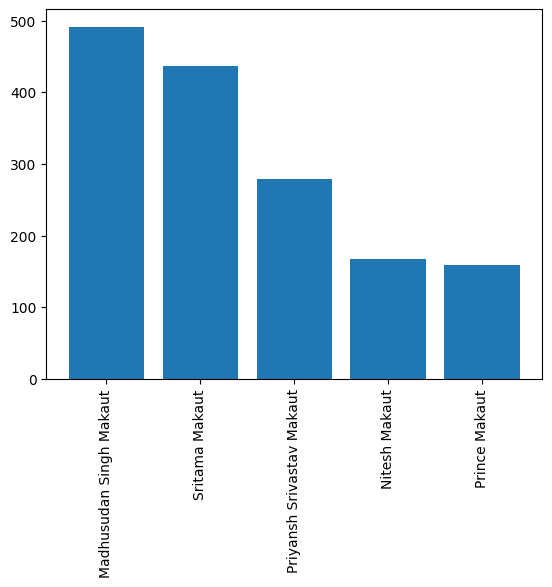

In [184]:
plt.bar(name , count )
plt.xticks(rotation='vertical')

In [185]:
temp = df[df['users'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']
temp = temp[temp['message'] != 'This message was deleted\n']
temp

,date,users,message,year,month,day,hour,minute
3,2023-11-30 12:37:00,Prince Makaut,Haa bhai\n,2023,November,30,12,37
5,2023-11-30 17:37:00,Nitesh Makaut,Semester exam kb hoga @⁨Sritama Makaut⁩ @⁨Prin...,2023,November,30,17,37
6,2023-11-30 21:12:00,MD MOAZZAM Makaut,Feb. me\n,2023,November,30,21,12
7,2023-11-30 21:59:00,Prince Makaut,Kal shambhu sir class lenge... Or Math ke clas...,2023,November,30,21,59
8,2023-11-30 22:02:00,Prince Makaut,Agar math ka class nahi hoga tu sambhu sir fir...,2023,November,30,22,2
...,...,...,...,...,...,...,...,...
4346,2025-09-21 10:54:00,Dipti Makaut,শুভ মহালয়া 🪷❤️\n,2025,September,21,10,54
4347,2025-09-21 11:14:00,+91 73849 54999,🌸 শুভ মহালয়া 🌸\nআমার পক্ষ থেকে সবাইকে আন্তরিক...,2025,September,21,11,14
4348,2025-09-21 13:14:00,Amar Kumar Sharma Makaut,Shubho Mahalaya!🙏\n,2025,September,21,13,14
4349,2025-09-22 23:20:00,Moumita Makaut,Kal kitne bajese class hoga ?\n,2025,September,22,23,20


In [186]:
f = open('stop_hinglish.txt','r')
stop_word = f.read()
#print(stop_word)

In [187]:
words=[]
for mssg in temp['message']:
    for j in mssg.lower().split():
        if j not in stop_word:
            words.append(j)

In [188]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,class,258
1,happy,244
2,makaut⁩,234
3,lab,182
4,birthday,180
5,group,126
6,message,102
7,grp,83
8,<this,77
9,edited>,77


In [189]:
import emoji
emojis = []
for mssg in df['message']:
    for c in mssg:
        if c in emoji.EMOJI_DATA:
            emojis.extend(c)
    


In [190]:
emoji_df=pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [191]:
df.head()

,date,users,message,year,month,day,hour,minute
0,2023-11-30 12:36:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,November,30,12,36
1,2023-11-29 22:33:00,group_notification,"Prince Makaut created group ""MAKAUT ( Sem-1 Un...",2023,November,29,22,33
2,2023-11-30 12:36:00,group_notification,You joined using this group's invite link\n,2023,November,30,12,36
3,2023-11-30 12:37:00,Prince Makaut,Haa bhai\n,2023,November,30,12,37
4,2023-11-30 17:37:00,group_notification,Nitesh Makaut joined using this group's invite...,2023,November,30,17,37


In [193]:
df['month_num'] = df['date'].dt.month

In [194]:
df.head()

,date,users,message,year,month,day,hour,minute,month_num
0,2023-11-30 12:36:00,group_notification,Messages and calls are end-to-end encrypted. O...,2023,November,30,12,36,11
1,2023-11-29 22:33:00,group_notification,"Prince Makaut created group ""MAKAUT ( Sem-1 Un...",2023,November,29,22,33,11
2,2023-11-30 12:36:00,group_notification,You joined using this group's invite link\n,2023,November,30,12,36,11
3,2023-11-30 12:37:00,Prince Makaut,Haa bhai\n,2023,November,30,12,37,11
4,2023-11-30 17:37:00,group_notification,Nitesh Makaut joined using this group's invite...,2023,November,30,17,37,11


In [199]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [208]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + " - " + str(timeline['year'][i]))

In [209]:
timeline['time'] = time

In [211]:
timeline.sample()

,year,month_num,month,message,time
5,2024,4,April,162,April - 2024


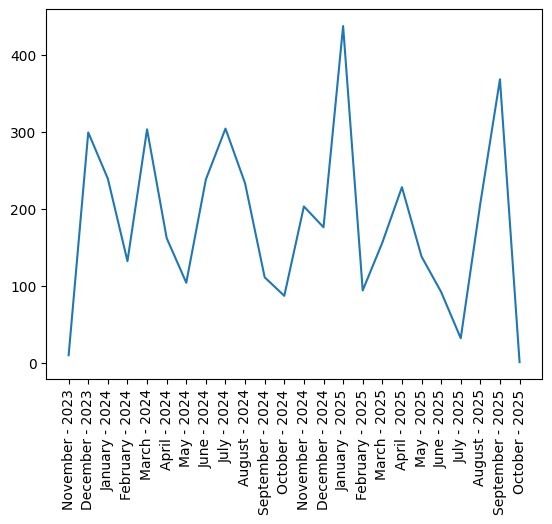

In [215]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [216]:
df['only_date'] = df['date'].dt.date

In [221]:
daily_timeline = df.groupby(['only_date']).count()['message'].reset_index()

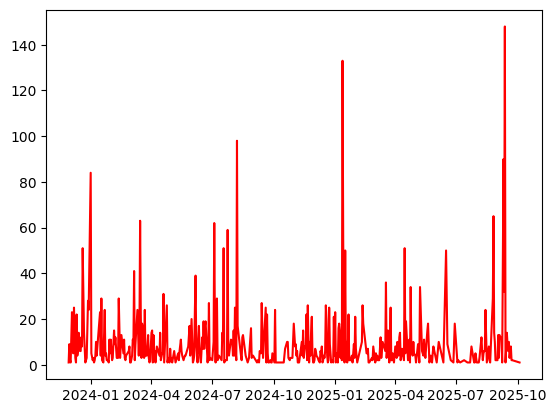

In [224]:
plt.plot(daily_timeline['only_date'],daily_timeline['message'],color='red')